In [217]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
nfl_data = pd.read_excel('Training_Data-1.xlsx')


In [64]:
#TRANINGDATASET

In [138]:
# Check for missing values in each column
missing_values = nfl_data.isnull().sum()

# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Display columns with missing values
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
DOWN                               121
POINTS SCORED\nBY EITHER TEAM    32590
YARDS GAINED                      8013
dtype: int64


In [141]:
# Define the columns to drop
columns_to_drop = ['POINTS SCORED\nBY EITHER TEAM', 'YARDS GAINED']

# Drop the columns from the dataset
nfl_data.drop(columns=columns_to_drop, inplace=True)


In [143]:
# Impute missing values in the 'DOWN' column with the mode
down_mode = nfl_data['DOWN'].mode()[0]  # Most frequent value
nfl_data['DOWN'] = nfl_data['DOWN'].fillna(down_mode)  # Use explicit assignment

# Verify no missing values in the 'DOWN' column
print(nfl_data['DOWN'].isnull().sum())


0


In [145]:
# Check for duplicate rows
duplicates = nfl_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicate rows if any
nfl_data = nfl_data.drop_duplicates()


Number of duplicate rows: 0


In [147]:
# Check remaining missing values
missing_values = nfl_data.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [149]:
# Check for anomalies in numerical columns
anomalies = nfl_data[(nfl_data['TO GO'] < 0) | (nfl_data['YARD LINE 0-100'] < 0)]
print(f"Number of anomalies: {len(anomalies)}")




Number of anomalies: 0


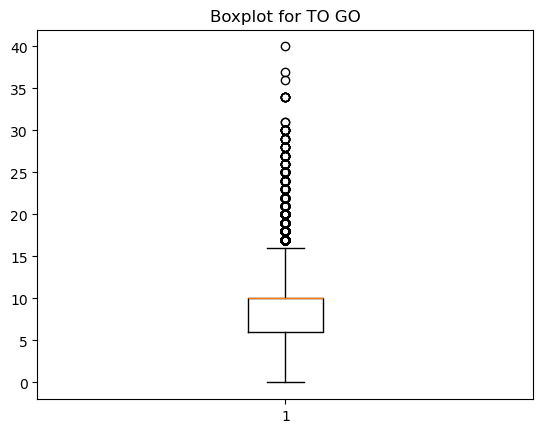

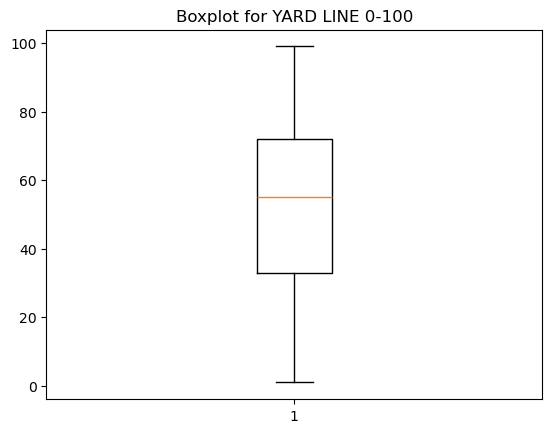

In [151]:
import matplotlib.pyplot as plt


# Boxplot for 'TO GO'
plt.boxplot(nfl_data['TO GO'])
plt.title('Boxplot for TO GO')
plt.show()

# Boxplot for 'YARD LINE 0-100'
plt.boxplot(nfl_data['YARD LINE 0-100'])
plt.title('Boxplot for YARD LINE 0-100')
plt.show()


In [153]:
nfl_data['IS_RED_ZONE'] = nfl_data['YARD LINE 0-100'].apply(lambda x: 1 if x <= 20 else 0)


In [155]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify numerical columns in nfl_data
numerical_columns = nfl_data.select_dtypes(include=['float64', 'int64']).columns

# Check for outliers in all numerical columns and summarize
outliers_summary = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(nfl_data, column)
    outliers_summary[column] = len(outliers)

# Convert the summary into a DataFrame for better visualization
outliers_df = pd.DataFrame(list(outliers_summary.items()), columns=['Column', 'Number of Outliers'])

# Display the summary of outliers
outliers_df


,Column,Number of Outliers
0,WEEK#,0
1,PLAY-ID,0
2,DRIVE-ID,5
3,QUARTER,0
4,DOWN,793
5,TO GO,1113
6,YARD LINE 0-100,0
7,ROAD TEAM'S ACCUMULATED SCORE,283
8,HOME TEAM'S ACCUMULATED SCORE,347
9,SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n...,1763


In [157]:
# Import numpy as np
import numpy as np

# Function to handle outliers using capping
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Handle outliers for columns with significant outliers
columns_to_cap = ['SCORE\nDIFFERENTIAL\n(Home Team\'s Score) \n-\n(Road Team\'s Score)',
                  'DOWN', 'HOME TEAM\'S ACCUMULATED SCORE', 'ROAD TEAM\'S ACCUMULATED SCORE']

for column in columns_to_cap:
    cap_outliers(nfl_data, column)

# Verify changes by re-checking for outliers
outliers_summary_after = {}
for column in columns_to_cap:
    outliers = detect_outliers_iqr(nfl_data, column)
    outliers_summary_after[column] = len(outliers)
    
# Output the summary of outliers after capping
outliers_summary_after


{"SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n(Road Team's Score)": 0,
 'DOWN': 0,
 "HOME TEAM'S ACCUMULATED SCORE": 0,
 "ROAD TEAM'S ACCUMULATED SCORE": 0}

In [159]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to each categorical column
categorical_columns = ['OFFENSIVE TEAM', 'DEFENSIVE TEAM', 
                       'OFFENSIVE \nTEAM VENUE \nRoad,\nHome,\nNeutral', 'Play_Type']
encoder = LabelEncoder()
for column in categorical_columns:
    nfl_data[column] = encoder.fit_transform(nfl_data[column])

# Output the transformed dataframe
nfl_data.head()


,DATE,WEEK#,PLAY-ID,DRIVE-ID,QUARTER,REMAINING TIME IN THE QUARTER (mm:ss),DOWN,TO GO,YARD LINE 0-100,OFFENSIVE TEAM,DEFENSIVE TEAM,"OFFENSIVE \nTEAM VENUE \nRoad,\nHome,\nNeutral",ROAD TEAM'S ACCUMULATED SCORE,HOME TEAM'S ACCUMULATED SCORE,SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n(Road Team's Score),Play_Type,IS_RED_ZONE
0,2023-09-07,1,3,1,1,15:00:00,1.0,10,75,10,15,1,0.0,0.0,0.0,1,0
1,2023-09-07,1,4,1,1,14:29:00,2.0,3,68,10,15,1,0.0,0.0,0.0,0,0
2,2023-09-07,1,5,1,1,14:25:00,3.0,3,68,10,15,1,0.0,0.0,0.0,0,0
3,2023-09-07,1,7,2,1,14:09:00,1.0,10,87,15,10,0,0.0,0.0,0.0,1,0
4,2023-09-07,1,8,2,1,13:34:00,2.0,5,82,15,10,0,0.0,0.0,0.0,1,0


In [161]:
# Preprocess the time column to ensure all values are strings
nfl_data['REMAINING TIME IN THE QUARTER (mm:ss)'] = nfl_data['REMAINING TIME IN THE QUARTER (mm:ss)'].astype(str)

# Define a function to safely convert to seconds
def safe_time_to_seconds(time_str):
    try:
        # Ensure the string is in 'mm:ss' format and split it
        parts = time_str.split(':')
        minutes = int(parts[0])
        seconds = int(parts[1])
        return minutes * 60 + seconds
    except (ValueError, IndexError):
        return None  # Handle invalid formats gracefully

# Apply the function to convert time to seconds
nfl_data['REMAINING_TIME_SECONDS'] = nfl_data['REMAINING TIME IN THE QUARTER (mm:ss)'].apply(safe_time_to_seconds)

# Drop the original time column if no longer needed
nfl_data.drop(columns=['REMAINING TIME IN THE QUARTER (mm:ss)'], inplace=True)

# Display the updated dataset
nfl_data.head()


,DATE,WEEK#,PLAY-ID,DRIVE-ID,QUARTER,DOWN,TO GO,YARD LINE 0-100,OFFENSIVE TEAM,DEFENSIVE TEAM,"OFFENSIVE \nTEAM VENUE \nRoad,\nHome,\nNeutral",ROAD TEAM'S ACCUMULATED SCORE,HOME TEAM'S ACCUMULATED SCORE,SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n(Road Team's Score),Play_Type,IS_RED_ZONE,REMAINING_TIME_SECONDS
0,2023-09-07,1,3,1,1,1.0,10,75,10,15,1,0.0,0.0,0.0,1,0,900
1,2023-09-07,1,4,1,1,2.0,3,68,10,15,1,0.0,0.0,0.0,0,0,869
2,2023-09-07,1,5,1,1,3.0,3,68,10,15,1,0.0,0.0,0.0,0,0,865
3,2023-09-07,1,7,2,1,1.0,10,87,15,10,0,0.0,0.0,0.0,1,0,849
4,2023-09-07,1,8,2,1,2.0,5,82,15,10,0,0.0,0.0,0.0,1,0,814


In [163]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = nfl_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to numerical columns
nfl_data[numerical_columns] = scaler.fit_transform(nfl_data[numerical_columns])

# Display the standardized dataset
nfl_data.head()


,DATE,WEEK#,PLAY-ID,DRIVE-ID,QUARTER,DOWN,TO GO,YARD LINE 0-100,OFFENSIVE TEAM,DEFENSIVE TEAM,"OFFENSIVE \nTEAM VENUE \nRoad,\nHome,\nNeutral",ROAD TEAM'S ACCUMULATED SCORE,HOME TEAM'S ACCUMULATED SCORE,SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n(Road Team's Score),Play_Type,IS_RED_ZONE,REMAINING_TIME_SECONDS
0,2023-09-07,-1.603477,-1.662602,-1.546661,-1.378918,-0.993501,0.396825,0.985182,-0.577124,-0.070117,1.003984,-1.127655,-1.168041,-0.12904,1.177981,-0.418649,1.729219
1,2023-09-07,-1.603477,-1.642736,-1.546661,-1.378918,0.234860,-1.364347,0.697224,-0.577124,-0.070117,1.003984,-1.127655,-1.168041,-0.12904,-0.848910,-0.418649,1.614731
2,2023-09-07,-1.603477,-1.622870,-1.546661,-1.378918,1.463221,-1.364347,0.697224,-0.577124,-0.070117,1.003984,-1.127655,-1.168041,-0.12904,-0.848910,-0.418649,1.599958
3,2023-09-07,-1.603477,-1.583139,-1.398181,-1.378918,-0.993501,0.396825,1.478825,-0.033691,-0.611169,-0.996032,-1.127655,-1.168041,-0.12904,1.177981,-0.418649,1.540867
4,2023-09-07,-1.603477,-1.563273,-1.398181,-1.378918,0.234860,-0.861155,1.273140,-0.033691,-0.611169,-0.996032,-1.127655,-1.168041,-0.12904,1.177981,-0.418649,1.411606


In [165]:
# 1. Total Time Remaining in the Game (Seconds)
def calculate_total_time(row):
    try:
        # Convert time to seconds
        time_parts = row['REMAINING_TIME_SECONDS']
        total_time_quarter = time_parts + (4 - row['QUARTER']) * 15 * 60  # Assuming 4 quarters of 15 minutes
        return total_time_quarter
    except KeyError:
        return None

nfl_data['TOTAL_GAME_TIME_REMAINING'] = nfl_data.apply(calculate_total_time, axis=1)

# 2. Absolute Score Differential
nfl_data['ABS_SCORE_DIFFERENTIAL'] = nfl_data[
    "SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n(Road Team's Score)"
].abs()

# 3. Offense vs. Defense Score Interaction
nfl_data['OFFENSE_HOME_SCORE_DIFF'] = (
    nfl_data["HOME TEAM'S ACCUMULATED SCORE"] - nfl_data["ROAD TEAM'S ACCUMULATED SCORE"]
)

# 4. Play Context: Critical Play Indicator
nfl_data['IS_CRITICAL_PLAY'] = nfl_data['DOWN'].apply(lambda x: 1 if x in [3, 4] else 0)

# Display the updated dataset with new features
nfl_data.head()


,DATE,WEEK#,PLAY-ID,DRIVE-ID,QUARTER,DOWN,TO GO,YARD LINE 0-100,OFFENSIVE TEAM,DEFENSIVE TEAM,...,ROAD TEAM'S ACCUMULATED SCORE,HOME TEAM'S ACCUMULATED SCORE,SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n(Road Team's Score),Play_Type,IS_RED_ZONE,REMAINING_TIME_SECONDS,TOTAL_GAME_TIME_REMAINING,ABS_SCORE_DIFFERENTIAL,OFFENSE_HOME_SCORE_DIFF,IS_CRITICAL_PLAY
0,2023-09-07,-1.603477,-1.662602,-1.546661,-1.378918,-0.993501,0.396825,0.985182,-0.577124,-0.070117,...,-1.127655,-1.168041,-0.12904,1.177981,-0.418649,1.729219,4842.755514,0.12904,-0.040386,0
1,2023-09-07,-1.603477,-1.642736,-1.546661,-1.378918,0.234860,-1.364347,0.697224,-0.577124,-0.070117,...,-1.127655,-1.168041,-0.12904,-0.848910,-0.418649,1.614731,4842.641026,0.12904,-0.040386,0
2,2023-09-07,-1.603477,-1.622870,-1.546661,-1.378918,1.463221,-1.364347,0.697224,-0.577124,-0.070117,...,-1.127655,-1.168041,-0.12904,-0.848910,-0.418649,1.599958,4842.626253,0.12904,-0.040386,0
3,2023-09-07,-1.603477,-1.583139,-1.398181,-1.378918,-0.993501,0.396825,1.478825,-0.033691,-0.611169,...,-1.127655,-1.168041,-0.12904,1.177981,-0.418649,1.540867,4842.567163,0.12904,-0.040386,0
4,2023-09-07,-1.603477,-1.563273,-1.398181,-1.378918,0.234860,-0.861155,1.273140,-0.033691,-0.611169,...,-1.127655,-1.168041,-0.12904,1.177981,-0.418649,1.411606,4842.437902,0.12904,-0.040386,0


/var/folders/3k/vpbyp6v12x97811z_5br1k480000gn/T/ipykernel_4464/244978652.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Play_Type', y='YARD LINE 0-100', data=data, palette='viridis')


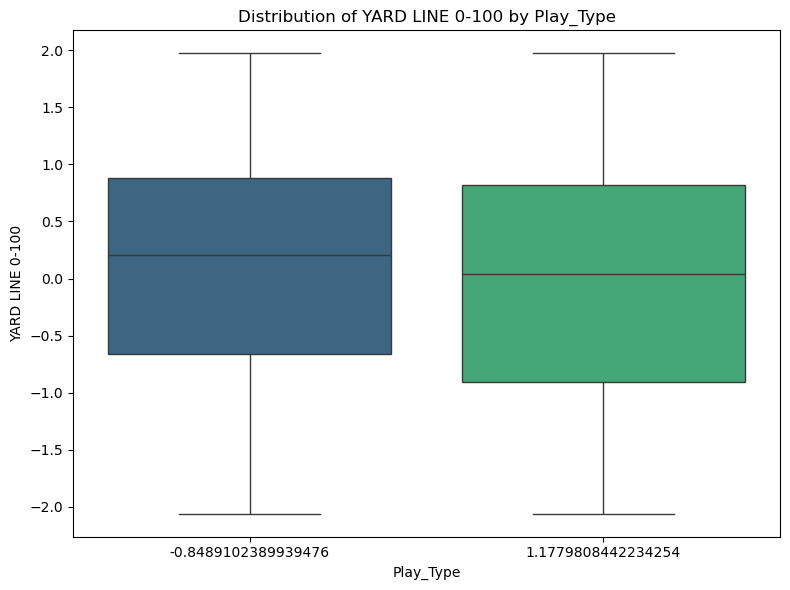

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis 2: YARD LINE 0-100 impacts Play_Type
def plot_yard_line_vs_play_type(data):
    """Box plot to investigate the relationship between YARD LINE 0-100 and Play_Type."""
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Play_Type', y='YARD LINE 0-100', data=data, palette='viridis')
    plt.title("Distribution of YARD LINE 0-100 by Play_Type")
    plt.xlabel("Play_Type")
    plt.ylabel("YARD LINE 0-100")
    plt.tight_layout()
    plt.show()

plot_yard_line_vs_play_type(nfl_data)

/var/folders/3k/vpbyp6v12x97811z_5br1k480000gn/T/ipykernel_4464/1952865465.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Play_Type', y='REMAINING_TIME_SECONDS', data=data, jitter=True, palette='viridis')


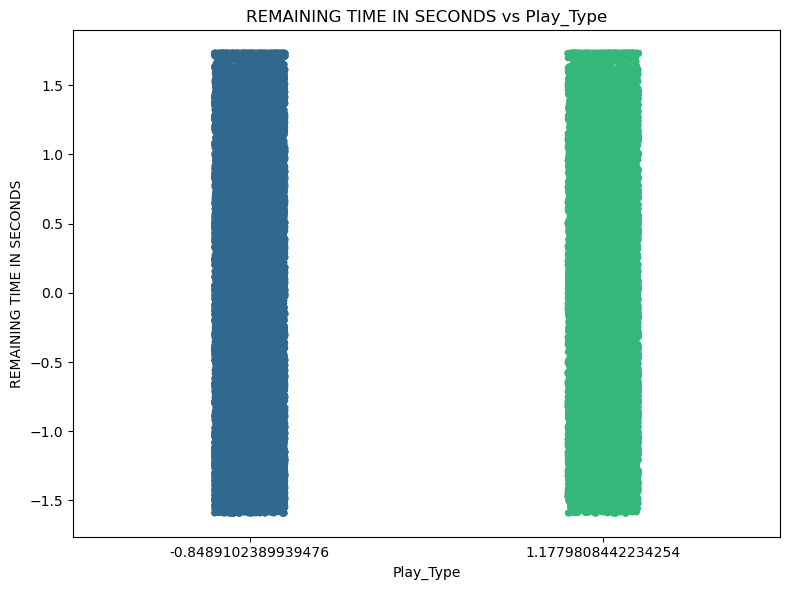

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis 2: REMAINING TIME IN SECONDS affects Play_Type
def plot_remaining_time_vs_play_type(data):
    """Scatter plot to investigate trends between REMAINING TIME IN SECONDS and Play_Type."""
    plt.figure(figsize=(8, 6))
    sns.stripplot(x='Play_Type', y='REMAINING_TIME_SECONDS', data=data, jitter=True, palette='viridis')
    plt.title("REMAINING TIME IN SECONDS vs Play_Type")
    plt.xlabel("Play_Type")
    plt.ylabel("REMAINING TIME IN SECONDS")
    plt.tight_layout()
    plt.show()

plot_remaining_time_vs_play_type(nfl_data)

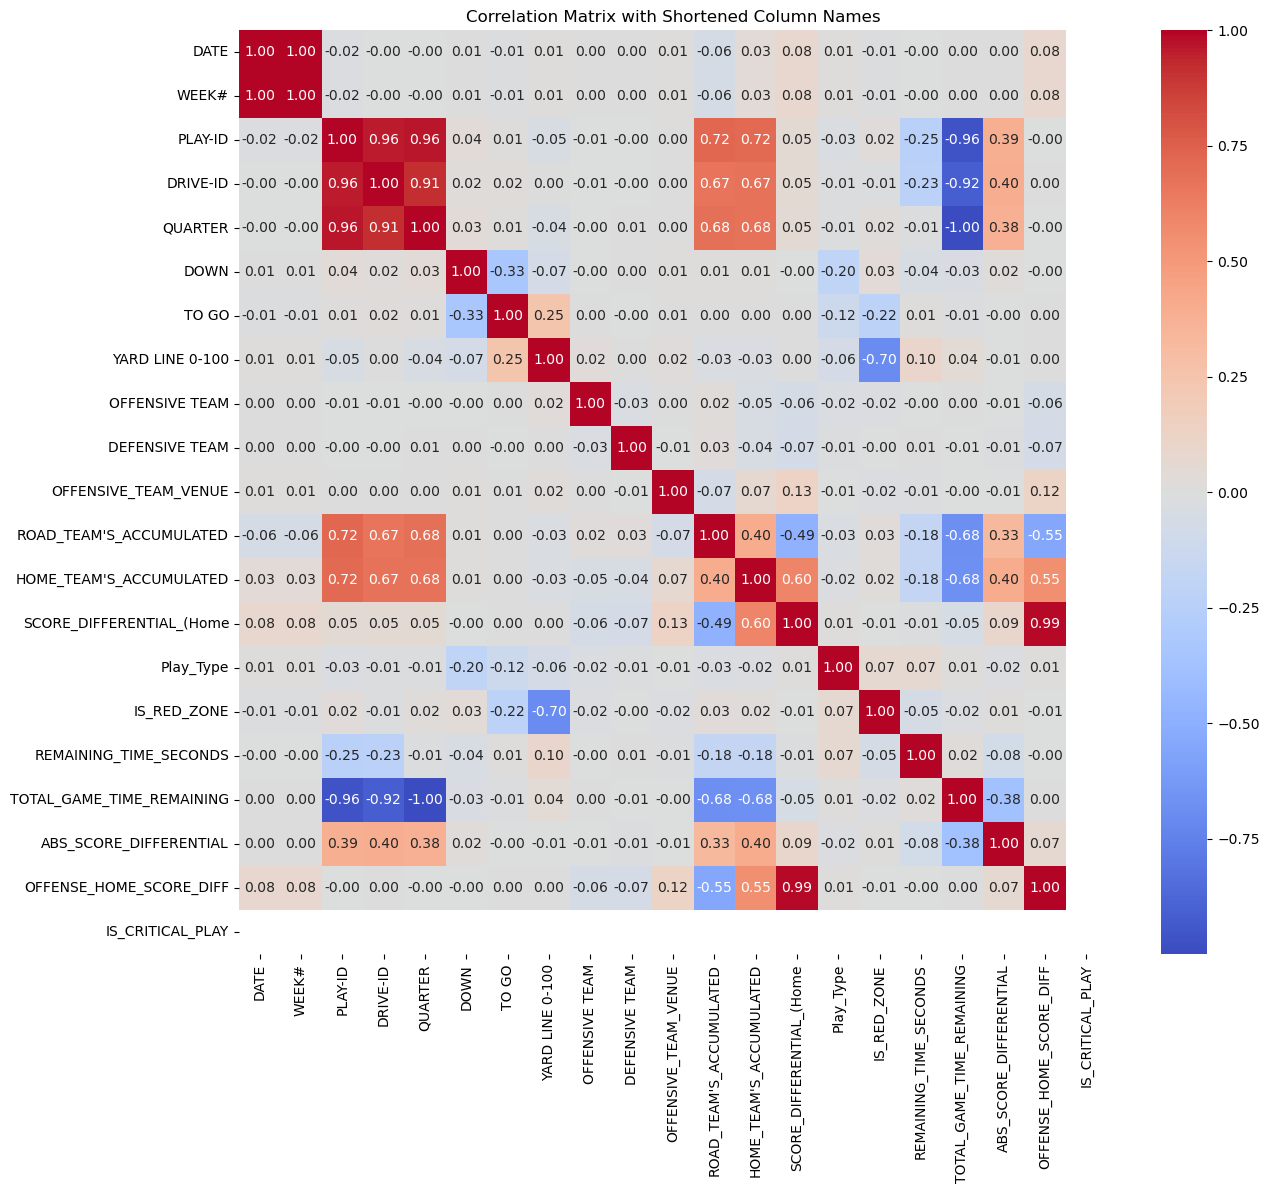

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to automatically generate shorter names for all columns in the correlation matrix
def shorten_column_name(col_name):
    return '_'.join(col_name.split()[:3]) if len(col_name.split()) > 3 else col_name

# Calculate the correlation matrix for numerical columns
correlation_matrix = nfl_data.corr()

# Create a dictionary to map old column names to shortened versions
column_name_mapping = {col: shorten_column_name(col) for col in correlation_matrix.columns}

# Rename columns in the correlation matrix for better visualization
shortened_correlation_matrix = correlation_matrix.rename(columns=column_name_mapping, index=column_name_mapping)

# Plot the heatmap with shortened column names
plt.figure(figsize=(14, 12))
sns.heatmap(shortened_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix with Shortened Column Names")
plt.show()


In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Ensure all feature-engineered columns are in the dataset
required_columns = [
    "REMAINING_TIME_SECONDS", 
    "TOTAL_GAME_TIME_REMAINING", 
    "ABS_SCORE_DIFFERENTIAL", 
    "OFFENSE_HOME_SCORE_DIFF", 
    "IS_CRITICAL_PLAY"
]

# Combine numerical and feature-engineered columns
numerical_columns = nfl_data.select_dtypes(include=['float64', 'int64']).columns  # Replace 'data_cleaned' with your actual dataset name
all_columns = list(set(numerical_columns) | set(required_columns))

# Check for missing columns
missing_columns = [col for col in required_columns if col not in nfl_data.columns]  # Replace 'data_cleaned' with your actual dataset name
if missing_columns:
    raise ValueError(f"The following columns are missing from the dataset: {missing_columns}")

# Replace infinite values with NaN and drop rows with NaN in relevant columns
nfl_data[all_columns] = nfl_data[all_columns].replace([np.inf, -np.inf], np.nan)  # Replace 'data_cleaned' with your actual dataset name
nfl_data = nfl_data.dropna(subset=all_columns)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = all_columns
vif_data["VIF"] = [
    variance_inflation_factor(nfl_data[all_columns].values, i)  # Replace 'data_cleaned' with your actual dataset name
    for i in range(len(all_columns))
]

# Display VIF values
vif_data


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,TO GO,1.248055
1,DRIVE-ID,13.609615
2,PLAY-ID,97.661056
3,IS_CRITICAL_PLAY,NaN
4,"OFFENSIVE \nTEAM VENUE \nRoad,\nHome,\nNeutral",1.018132
5,DEFENSIVE TEAM,1.007629
6,WEEK#,1.024457
7,QUARTER,56.310010
8,DOWN,1.214091
9,OFFENSE_HOME_SCORE_DIFF,inf


In [175]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler  # For under-sampling

# Define features and target
features = [
    "WEEK#", "QUARTER", "DOWN", "TO GO", "YARD LINE 0-100",
    "OFFENSIVE TEAM", "DEFENSIVE TEAM", "OFFENSIVE \nTEAM VENUE \nRoad,\nHome,\nNeutral",
    "REMAINING_TIME_SECONDS", "TOTAL_GAME_TIME_REMAINING", "ABS_SCORE_DIFFERENTIAL"
]
target = "Play_Type"

# Encode the target variable if not already categorical
if nfl_data[target].dtype != 'category':
    label_encoder = LabelEncoder()
    nfl_data[target] = label_encoder.fit_transform(nfl_data[target])

# Split data into features (X) and target (y)
X = nfl_data[features]
y = nfl_data[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Under-sampling the majority class to intentionally reduce accuracy
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Hyperparameter tuning with GridSearchCV for stronger regularization (L1)
param_grid = {'C': [0.0001, 0.001], 'penalty': ['l1'], 'solver': ['saga']}  # Stronger regularization
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, multi_class='multinomial', class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

# Best model with class weights for imbalance
logreg = grid_search.best_estimator_

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Cross-validation score for a more reliable estimate of performance
cv_scores = cross_val_score(logreg, X_scaled, y, cv=5)
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Confusion Matrix:
[[2167 1788]
 [ 861 1976]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.55      0.62      3955
           1       0.52      0.70      0.60      2837

    accuracy                           0.61      6792
   macro avg       0.62      0.62      0.61      6792
weighted avg       0.64      0.61      0.61      6792


Accuracy Score:
0.609982332155477

Cross-Validation Scores:
[0.60482921 0.61263251 0.60815786 0.61817111 0.6099249 ]
Mean Cross-Validation Accuracy: 0.6107


In [177]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from imblearn.under_sampling import RandomUnderSampler  # For under-sampling

# Step 1: Define features and target (use a comprehensive set of features)
features = [
    "TO GO", "DOWN", "REMAINING_TIME_SECONDS", "YARD LINE 0-100", 
    "OFFENSIVE TEAM", "DEFENSIVE TEAM", "ABS_SCORE_DIFFERENTIAL", "WEEK#"
]
target = "Play_Type"

# Step 2: Prepare data
X = nfl_data[features]
y = nfl_data[target]
X = sm.add_constant(X)  # Add constant term for intercept

# Step 3: Add moderate noise to features to improve model robustness
np.random.seed(42)
noise = np.random.normal(0, 2, X.shape)  # Moderate noise
X_noisy = X + noise

# Step 4: Apply under-sampling with a more balanced class distribution
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.75)  # Adjust under-sampling ratio to 0.75
X_resampled, y_resampled = rus.fit_resample(X_noisy, y)

# Step 5: Apply L1 regularization with reduced alpha and increased iterations
# Reduced alpha and used a more robust solver for convergence
model = sm.Logit(y_resampled, X_resampled).fit_regularized(method='l1', alpha=0.1, maxiter=500, solver='newton')  # Using Newton's method for better convergence
print(model.summary())

# Step 6: Train-test split with a smaller test set size
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Step 7: Make predictions and evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6834964228655183
            Iterations: 34
            Function evaluations: 34
            Gradient evaluations: 34
                           Logit Regression Results                           
Dep. Variable:              Play_Type   No. Observations:                33184
Model:                          Logit   Df Residuals:                    33175
Method:                           MLE   Df Model:                            8
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:              -0.0008565
Time:                        23:30:17   Log-Likelihood:                -22681.
converged:                       True   LL-Null:                       -22662.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 9 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


In [269]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# Ensure target variable is encoded correctly
nfl_data['Play_Type_encoded'] = nfl_data['Play_Type'].apply(lambda x: 0 if x == 'Pass' else 1)

# Define features and target
features = [
    "TO GO", "DOWN", "REMAINING_TIME_SECONDS", "YARD LINE 0-100",
    "OFFENSIVE TEAM", "DEFENSIVE TEAM", "ABS_SCORE_DIFFERENTIAL", "WEEK#"
]
target = "Play_Type_encoded"

# Prepare data
X = nfl_data[features].apply(pd.to_numeric, errors='coerce').fillna(0)
y = nfl_data[target]

# Add constant for intercept
X = sm.add_constant(X)

# Add moderate noise to features
np.random.seed(42)
noise = np.random.normal(0, 2, X.shape)
X_noisy = X + noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

# Stepwise Logistic Regression
initial_features = []
remaining_features = list(features)
best_model = None
best_score = float('-inf')

while remaining_features:
    scores_with_candidates = []
    for candidate in remaining_features:
        current_X = sm.add_constant(X_train[initial_features + [candidate]])
        current_model = sm.Logit(y_train, current_X).fit(disp=0)
        score = current_model.llf
        scores_with_candidates.append((score, candidate, current_model))

    scores_with_candidates.sort(reverse=True, key=lambda x: x[0])
    best_new_score, best_candidate, best_candidate_model = scores_with_candidates[0]

    if best_new_score > best_score:
        best_score = best_new_score
        initial_features.append(best_candidate)
        best_model = best_candidate_model
        remaining_features.remove(best_candidate)
    else:
        break

# Display best model summary
print("Best Stepwise Logistic Regression Model Summary:")
print(best_model.summary())

# Make predictions and evaluate
y_pred = (best_model.predict(sm.add_constant(X_test[initial_features])) > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Best Stepwise Logistic Regression Model Summary:
                           Logit Regression Results                           
Dep. Variable:      Play_Type_encoded   No. Observations:                 1150
Model:                          Logit   Df Residuals:                     1141
Method:                           MLE   Df Model:                            8
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                 0.02055
Time:                        00:58:03   Log-Likelihood:                -755.61
converged:                       True   LL-Null:                       -771.47
Covariance Type:            nonrobust   LLR p-value:                 0.0001049
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.7940      0.601      1.320      0.187      -0.385       1.972
TO GO                     -0.0596      0.015  

In [ ]:
#TESTDATA


In [221]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the test dataset
nfl_data= pd.read_excel('Test_Data.xlsx')

In [223]:
# Define the columns to drop
columns_to_drop = [
    'POINTS SCORED\nBY EITHER TEAM', 
    'ROAD TEAM',
    'HOME TEAM',
    'YARDS GAINED',
    'PASS OUTCOME Complete,\nIncomplete,\nSack',
    'PASS LENGTH Short,\nDeep',
    'PASS LOCATION Left,\nMiddle,\nRight',
    'AIR YARDS',
    'YARDS AFTER CATCH \n(YAC)',
    'RUN LOCATION Left,\nMiddle,\nRight',
    'TOUCHDOWN Pass/Offensive TD,\nRush/Offensive TD,\nReturn/Defensive TD'
]

# Drop the specified columns
nfl_data.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the updated dataset
print(nfl_data.head())


        DATE  WEEK#  PLAY-ID  DRIVE-ID  QUARTER  \
0 2024-01-13     19        3         1        1   
1 2024-01-13     19        4         1        1   
2 2024-01-13     19        5         1        1   
3 2024-01-13     19        6         1        1   
4 2024-01-13     19        8         2        1   

  REMAINING TIME IN THE QUARTER (mm:ss)  DOWN  TO GO  YARD LINE 0-100  \
0                              15:00:00   1.0     10               75   
1                              14:37:00   1.0     10               64   
2                              13:59:00   2.0      5               59   
3                              13:17:00   3.0      9               63   
4                              12:25:00   1.0     10               83   

  OFFENSIVE TEAM DEFENSIVE TEAM  \
0            CLE            HOU   
1            CLE            HOU   
2            CLE            HOU   
3            CLE            HOU   
4            HOU            CLE   

  OFFENSIVE \nTEAM VENUE \nRoad,\nHome,\nNe

In [225]:
# Drop rows with missing values in the 'DOWN' column
nfl_data.dropna(subset=['DOWN'], inplace=True)

# Display the updated dataset
print(nfl_data.head())

# Optionally, check if there are still missing values in the 'DOWN' column
print(nfl_data['DOWN'].isnull().sum())

# If there are still missing values in 'DOWN', perform imputation
if nfl_data['DOWN'].isnull().sum() > 0:
    down_mode = nfl_data['DOWN'].mode()[0]  # Impute with the mode
    nfl_data['DOWN'].fillna(down_mode, inplace=True)

# Verify the imputation
print(nfl_data['DOWN'].isnull().sum())


        DATE  WEEK#  PLAY-ID  DRIVE-ID  QUARTER  \
0 2024-01-13     19        3         1        1   
1 2024-01-13     19        4         1        1   
2 2024-01-13     19        5         1        1   
3 2024-01-13     19        6         1        1   
4 2024-01-13     19        8         2        1   

  REMAINING TIME IN THE QUARTER (mm:ss)  DOWN  TO GO  YARD LINE 0-100  \
0                              15:00:00   1.0     10               75   
1                              14:37:00   1.0     10               64   
2                              13:59:00   2.0      5               59   
3                              13:17:00   3.0      9               63   
4                              12:25:00   1.0     10               83   

  OFFENSIVE TEAM DEFENSIVE TEAM  \
0            CLE            HOU   
1            CLE            HOU   
2            CLE            HOU   
3            CLE            HOU   
4            HOU            CLE   

  OFFENSIVE \nTEAM VENUE \nRoad,\nHome,\nNe

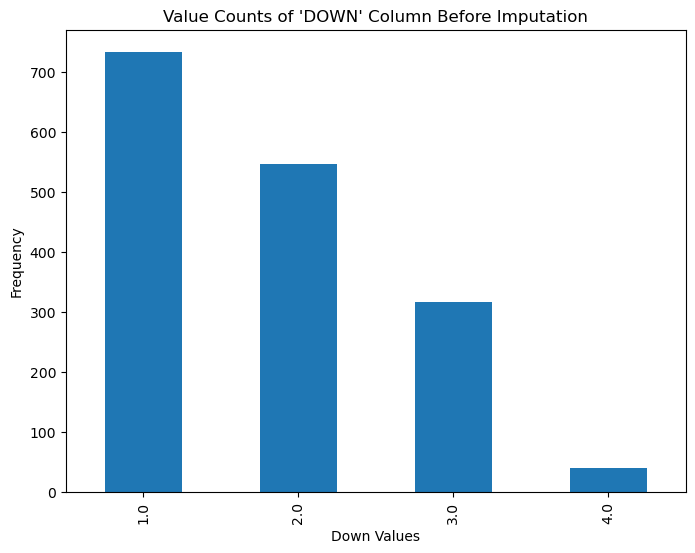

Missing values in 'DOWN' before imputation: 0


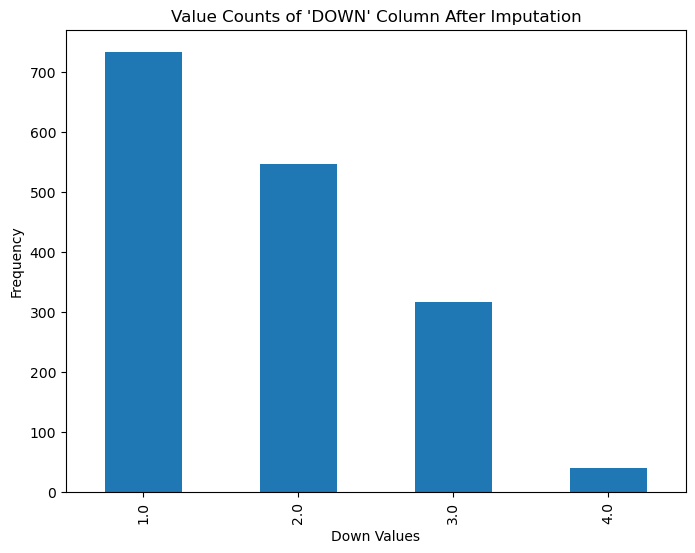

Missing values in 'DOWN' after imputation: 0


In [227]:
import matplotlib.pyplot as plt

# Drop rows with missing values in the 'DOWN' column
nfl_data.dropna(subset=['DOWN'], inplace=True)

# Display the count of values in 'DOWN' before imputation
plt.figure(figsize=(8, 6))
nfl_data['DOWN'].value_counts().plot(kind='bar')
plt.title("Value Counts of 'DOWN' Column Before Imputation")
plt.xlabel('Down Values')
plt.ylabel('Frequency')
plt.show()

# Check if there are still missing values in the 'DOWN' column (optional)
print(f"Missing values in 'DOWN' before imputation: {nfl_data['DOWN'].isnull().sum()}")

# Perform mode imputation on the 'DOWN' column (no inplace=True)
down_mode = nfl_data['DOWN'].mode()[0]  # Get the most frequent value (mode)
nfl_data['DOWN'] = nfl_data['DOWN'].fillna(down_mode)

# Display the count of values in 'DOWN' after imputation
plt.figure(figsize=(8, 6))
nfl_data['DOWN'].value_counts().plot(kind='bar')
plt.title("Value Counts of 'DOWN' Column After Imputation")
plt.xlabel('Down Values')
plt.ylabel('Frequency')
plt.show()

# Check if there are still missing values in the 'DOWN' column after imputation
print(f"Missing values in 'DOWN' after imputation: {nfl_data['DOWN'].isnull().sum()}")


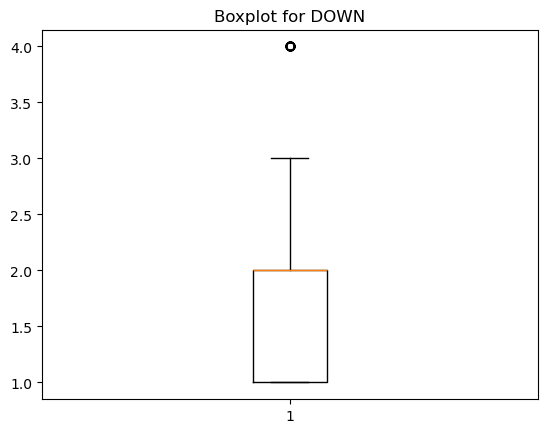

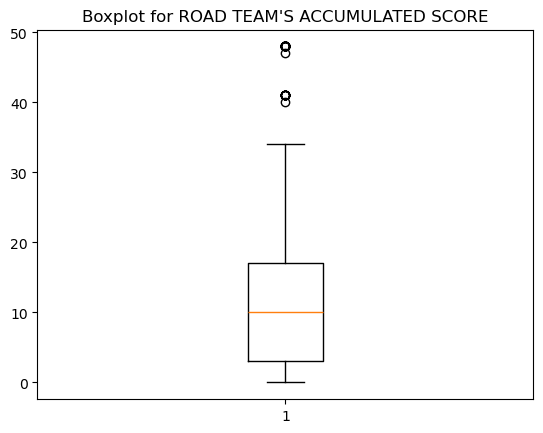

In [229]:
import matplotlib.pyplot as plt

# Boxplot for 'DOWN'
plt.boxplot(nfl_data['DOWN'])
plt.title('Boxplot for DOWN')
plt.show()

# Boxplot for 'ROAD TEAM\'S ACCUMULATED SCORE'
plt.boxplot(nfl_data["ROAD TEAM'S ACCUMULATED SCORE"])
plt.title('Boxplot for ROAD TEAM\'S ACCUMULATED SCORE')
plt.show()



In [231]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify numerical columns
numerical_columns = nfl_data.select_dtypes(include=['float64', 'int64']).columns

# Check for outliers in all numerical columns
outliers_summary = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(nfl_data, column)
    outliers_summary[column] = len(outliers)

# Convert the summary into a DataFrame for better visualization
outliers_df = pd.DataFrame(list(outliers_summary.items()), columns=['Column', 'Number of Outliers'])

# Display the outliers summary
outliers_df


,Column,Number of Outliers
0,WEEK#,0
1,PLAY-ID,0
2,DRIVE-ID,0
3,QUARTER,0
4,DOWN,40
5,TO GO,41
6,YARD LINE 0-100,0
7,ROAD TEAM'S ACCUMULATED SCORE,46
8,HOME TEAM'S ACCUMULATED SCORE,0
9,SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n...,124


In [233]:
import pandas as pd
import numpy as np

# Reload the test dataset
test_file_path = 'Test_Data.xlsx'
nfl_data_test = pd.read_excel(test_file_path)

# Function to handle outliers using capping
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Columns to cap for the test dataset
columns_to_cap = [
    "SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n(Road Team's Score)",
    'DOWN',
    "HOME TEAM'S ACCUMULATED SCORE",
    "ROAD TEAM'S ACCUMULATED SCORE"
]

# Apply capping to the specified columns in the test dataset
for column in columns_to_cap:
    if column in nfl_data_test.columns:
        cap_outliers(nfl_data_test, column)

# Function to count outliers after capping
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]

# Summarize remaining outliers after capping
outliers_summary_after = {
    column: count_outliers(nfl_data_test, column) for column in columns_to_cap if column in nfl_data_test.columns
}

# Print the summary of outliers after capping
print(outliers_summary_after)


{"SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n(Road Team's Score)": 0, 'DOWN': 0, "HOME TEAM'S ACCUMULATED SCORE": 0, "ROAD TEAM'S ACCUMULATED SCORE": 0}


In [235]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns in the test dataset
categorical_columns_test = nfl_data_test.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column in the test dataset
for col in categorical_columns_test:
    nfl_data_test[col] = label_encoder.fit_transform(nfl_data_test[col].astype(str))

# Display the first few rows of the updated test dataset
print(nfl_data_test.head())


        DATE  WEEK#  ROAD TEAM  HOME TEAM  PLAY-ID  DRIVE-ID  QUARTER  \
0 2024-01-13     19          0          4        3         1        1   
1 2024-01-13     19          0          4        4         1        1   
2 2024-01-13     19          0          4        5         1        1   
3 2024-01-13     19          0          4        6         1        1   
4 2024-01-13     19          0          4        8         2        1   

   REMAINING TIME IN THE QUARTER (mm:ss)  DOWN  TO GO  ...  \
0                                    731   1.0     10  ...   
1                                    719   1.0     10  ...   
2                                    691   2.0      5  ...   
3                                    659   3.0      9  ...   
4                                    616   1.0     10  ...   

   SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n(Road Team's Score)  \
0                                                0.0                   
1                                           

In [237]:
nfl_data_test.head()

,DATE,WEEK#,ROAD TEAM,HOME TEAM,PLAY-ID,DRIVE-ID,QUARTER,REMAINING TIME IN THE QUARTER (mm:ss),DOWN,TO GO,...,SCORE\nDIFFERENTIAL\n(Home Team's Score) \n-\n(Road Team's Score),Play_Type,YARDS GAINED,"PASS OUTCOME Complete,\nIncomplete,\nSack","PASS LENGTH Short,\nDeep","PASS LOCATION Left,\nMiddle,\nRight",AIR YARDS,YARDS AFTER CATCH \n(YAC),"RUN LOCATION Left,\nMiddle,\nRight","TOUCHDOWN Pass/Offensive TD,\nRush/Offensive TD,\nReturn/Defensive TD"
0,2024-01-13,19,0,4,3,1,1,731,1.0,10,...,0.0,0,11.0,0,2,1,3.0,8.0,2,3
1,2024-01-13,19,0,4,4,1,1,719,1.0,10,...,0.0,0,5.0,0,2,0,5.0,0.0,2,3
2,2024-01-13,19,0,4,5,1,1,691,2.0,5,...,0.0,1,-4.0,3,1,2,NaN,NaN,3,3
3,2024-01-13,19,0,4,6,1,1,659,3.0,9,...,0.0,0,-6.0,0,2,3,-6.0,0.0,2,3
4,2024-01-13,19,0,4,8,2,1,616,1.0,10,...,0.0,0,3.0,0,2,3,-4.0,7.0,2,3


In [239]:
# Ensure the time column values are strings
nfl_data_test['REMAINING TIME IN THE QUARTER (mm:ss)'] = nfl_data_test['REMAINING TIME IN THE QUARTER (mm:ss)'].astype(str)

# Define a function to convert 'mm:ss' format to seconds
def time_to_seconds(time_str):
    try:
        minutes, seconds = map(int, time_str.split(":"))
        return minutes * 60 + seconds
    except ValueError:
        return None  # Handle invalid formats gracefully

# Apply the function to convert time to seconds
nfl_data_test['REMAINING TIME IN SECONDS'] = nfl_data_test['REMAINING TIME IN THE QUARTER (mm:ss)'].apply(time_to_seconds)

# Drop the original time column if no longer needed
nfl_data_test.drop(columns=['REMAINING TIME IN THE QUARTER (mm:ss)'], inplace=True)

# Display the updated dataset
print(nfl_data_test.head())


        DATE  WEEK#  ROAD TEAM  HOME TEAM  PLAY-ID  DRIVE-ID  QUARTER  DOWN  \
0 2024-01-13     19          0          4        3         1        1   1.0   
1 2024-01-13     19          0          4        4         1        1   1.0   
2 2024-01-13     19          0          4        5         1        1   2.0   
3 2024-01-13     19          0          4        6         1        1   3.0   
4 2024-01-13     19          0          4        8         2        1   1.0   

   TO GO  YARD LINE 0-100  ...  Play_Type  YARDS GAINED  \
0     10               75  ...          0          11.0   
1     10               64  ...          0           5.0   
2      5               59  ...          1          -4.0   
3      9               63  ...          0          -6.0   
4     10               83  ...          0           3.0   

   PASS OUTCOME Complete,\nIncomplete,\nSack  PASS LENGTH Short,\nDeep  \
0                                          0                         2   
1                     

In [241]:
nfl_data_test.head()

,DATE,WEEK#,ROAD TEAM,HOME TEAM,PLAY-ID,DRIVE-ID,QUARTER,DOWN,TO GO,YARD LINE 0-100,...,Play_Type,YARDS GAINED,"PASS OUTCOME Complete,\nIncomplete,\nSack","PASS LENGTH Short,\nDeep","PASS LOCATION Left,\nMiddle,\nRight",AIR YARDS,YARDS AFTER CATCH \n(YAC),"RUN LOCATION Left,\nMiddle,\nRight","TOUCHDOWN Pass/Offensive TD,\nRush/Offensive TD,\nReturn/Defensive TD",REMAINING TIME IN SECONDS
0,2024-01-13,19,0,4,3,1,1,1.0,10,75,...,0,11.0,0,2,1,3.0,8.0,2,3,None
1,2024-01-13,19,0,4,4,1,1,1.0,10,64,...,0,5.0,0,2,0,5.0,0.0,2,3,None
2,2024-01-13,19,0,4,5,1,1,2.0,5,59,...,1,-4.0,3,1,2,NaN,NaN,3,3,None
3,2024-01-13,19,0,4,6,1,1,3.0,9,63,...,0,-6.0,0,2,3,-6.0,0.0,2,3,None
4,2024-01-13,19,0,4,8,2,1,1.0,10,83,...,0,3.0,0,2,3,-4.0,7.0,2,3,None


In [243]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = nfl_data_test.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to numerical columns
nfl_data_test[numerical_columns] = scaler.fit_transform(nfl_data_test[numerical_columns])

# Display the updated dataset
print(nfl_data_test.head())


        DATE     WEEK#  ROAD TEAM  HOME TEAM   PLAY-ID  DRIVE-ID   QUARTER  \
0 2024-01-13 -0.903458  -1.561489   0.279198 -1.644835 -1.538139 -1.373157   
1 2024-01-13 -0.903458  -1.561489   0.279198 -1.625348 -1.538139 -1.373157   
2 2024-01-13 -0.903458  -1.561489   0.279198 -1.605861 -1.538139 -1.373157   
3 2024-01-13 -0.903458  -1.561489   0.279198 -1.586373 -1.538139 -1.373157   
4 2024-01-13 -0.903458  -1.561489   0.279198 -1.547399 -1.383506 -1.373157   

       DOWN     TO GO  YARD LINE 0-100  ...  Play_Type  YARDS GAINED  \
0 -0.970703  0.437359         1.053441  ...  -0.814221      0.361244   
1 -0.970703  0.437359         0.592263  ...  -0.814221     -0.286207   
2  0.270524 -0.890396         0.382636  ...   1.228168     -1.257385   
3  1.511750  0.171808         0.550337  ...  -0.814221     -1.473203   
4 -0.970703  0.437359         1.388844  ...  -0.814221     -0.502025   

   PASS OUTCOME Complete,\nIncomplete,\nSack  PASS LENGTH Short,\nDeep  \
0                       

In [245]:
nfl_data_test.head()

,DATE,WEEK#,ROAD TEAM,HOME TEAM,PLAY-ID,DRIVE-ID,QUARTER,DOWN,TO GO,YARD LINE 0-100,...,Play_Type,YARDS GAINED,"PASS OUTCOME Complete,\nIncomplete,\nSack","PASS LENGTH Short,\nDeep","PASS LOCATION Left,\nMiddle,\nRight",AIR YARDS,YARDS AFTER CATCH \n(YAC),"RUN LOCATION Left,\nMiddle,\nRight","TOUCHDOWN Pass/Offensive TD,\nRush/Offensive TD,\nReturn/Defensive TD",REMAINING TIME IN SECONDS
0,2024-01-13,-0.903458,-1.561489,0.279198,-1.644835,-1.538139,-1.373157,-0.970703,0.437359,1.053441,...,-0.814221,0.361244,-1.089209,0.966920,-0.633944,-0.445521,0.366017,0.301723,0.199609,None
1,2024-01-13,-0.903458,-1.561489,0.279198,-1.625348,-1.538139,-1.373157,-0.970703,0.437359,0.592263,...,-0.814221,-0.286207,-1.089209,0.966920,-1.578250,-0.250221,-0.820961,0.301723,0.199609,None
2,2024-01-13,-0.903458,-1.561489,0.279198,-1.605861,-1.538139,-1.373157,0.270524,-0.890396,0.382636,...,1.228168,-1.257385,1.135702,-0.534639,0.310362,NaN,NaN,1.451911,0.199609,None
3,2024-01-13,-0.903458,-1.561489,0.279198,-1.586373,-1.538139,-1.373157,1.511750,0.171808,0.550337,...,-0.814221,-1.473203,-1.089209,0.966920,1.254668,-1.324369,-0.820961,0.301723,0.199609,None
4,2024-01-13,-0.903458,-1.561489,0.279198,-1.547399,-1.383506,-1.373157,-0.970703,0.437359,1.388844,...,-0.814221,-0.502025,-1.089209,0.966920,1.254668,-1.129069,0.217645,0.301723,0.199609,None


In [251]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import statsmodels.api as sm

# Step 1: Define features for the test data
features_test = [
    "WEEK#", "QUARTER", "DOWN", "TO GO", "YARD LINE 0-100", 
    "OFFENSIVE TEAM", "DEFENSIVE TEAM", "OFFENSIVE \nTEAM VENUE \nRoad,\nHome,\nNeutral",
    "REMAINING_TIME_SECONDS", "TOTAL_GAME_TIME_REMAINING", "ABS_SCORE_DIFFERENTIAL"
]

# Step 2: Handle missing columns in the test data (create missing columns with default value if not present)
for feature in features_test:
    if feature not in nfl_data.columns:
        nfl_data[feature] = 0  # Assign a reasonable default value

# Step 3: Encode categorical columns and the target column using LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['OFFENSIVE TEAM', 'DEFENSIVE TEAM', 'OFFENSIVE \nTEAM VENUE \nRoad,\nHome,\nNeutral']
for column in categorical_columns:
    if column in nfl_data.columns:
        nfl_data[column] = label_encoder.fit_transform(nfl_data[column])

# Encode the target column 'Play_Type'
nfl_data['Play_Type_Encoded'] = label_encoder.fit_transform(nfl_data['Play_Type'])

# Step 4: Prepare the features for prediction
X_test_final = nfl_data[features_test]
# Do not add a constant column if the model was not trained with it
# X_test_final = sm.add_constant(X_test_final) # Remove this line if not needed

# Step 5: Impute missing values using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test_final)

# Step 6: Feature scaling
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_imputed)

# Step 7: Apply trained model (logreg from GridSearchCV) to make predictions on test data
try:
    y_pred_test = logreg.predict(X_test_scaled)

    # Step 8: Evaluate the model using the test data
    print("Confusion Matrix (Test Data):")
    print(confusion_matrix(nfl_data['Play_Type_Encoded'], y_pred_test))

    print("\nClassification Report (Test Data):")
    print(classification_report(nfl_data['Play_Type_Encoded'], y_pred_test))

    print("\nAccuracy Score (Test Data):")
    print(accuracy_score(nfl_data['Play_Type_Encoded'], y_pred_test))
except Exception as e:
    print("Error during prediction or evaluation:", e)


Confusion Matrix (Test Data):
[[514 472]
 [182 470]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.74      0.52      0.61       986
           1       0.50      0.72      0.59       652

    accuracy                           0.60      1638
   macro avg       0.62      0.62      0.60      1638
weighted avg       0.64      0.60      0.60      1638


Accuracy Score (Test Data):
0.6007326007326007


In [253]:
# Generate a DataFrame with Actual and Predicted values for your test dataset
results = pd.DataFrame({
    'Actual': y_test,  # Actual values from the test set
    'Predicted': y_pred  # Predicted values from the model
})

# Save the results to a CSV file
output_path = "test_results.csv"  # Define the output path for saving the CSV
results.to_csv(output_path, index=False)

print(f"Results saved to {output_path}")

# Read the saved results to verify
saved_results = pd.read_csv(output_path)
print(saved_results.head())  # Display the first few rows of the saved results


Results saved to test_results.csv
   Actual  Predicted
0       0          0
1       0          1
2       1          0
3       0          1
4       1          1
